In [104]:
import pandas as pd
import numpy as np
import warnings
from sklearn import preprocessing,tree
warnings.filterwarnings('ignore')

df = pd.read_csv("Airlinedata.csv")

df_clean = pd.DataFrame()
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [105]:
print("If any missing data = ", df.isnull().sum())


If any missing data =  Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [106]:

df = df.dropna(subset=['Route', 'Total_Stops'])

print("Shape of cleaned DataFrame:", df.shape)

Shape of cleaned DataFrame: (10682, 11)


In [107]:

df[['Date_of_Journey']] = df[['Date_of_Journey']].apply(pd.to_datetime,format="%d/%m/%Y")
df_clean['Date_of_Journey_timestamp'] = pd.to_datetime(df['Date_of_Journey']).astype('int64') / 10**9
df_clean['Duration_en'] = df['Duration'].apply(lambda x: duration_to_minutes(x))
df_clean['Departure_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df_clean['Departure_Minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

df_clean['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df_clean['Arrival_Minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute
print(df_clean.head(10))


   Date_of_Journey_timestamp  Duration_en  Departure_Hour  Departure_Minute  \
0               1.553386e+09          170              22                20   
1               1.556669e+09          445               5                50   
2               1.560038e+09         1140               9                25   
3               1.557619e+09          325              18                 5   
4               1.551398e+09          285              16                50   
5               1.561334e+09          145               9                 0   
6               1.552349e+09          930              18                55   
7               1.551398e+09         1265               8                 0   
8               1.552349e+09         1530               8                55   
9               1.558915e+09          470              11                25   

   Arrival_Hour  Arrival_Minute  
0             1              10  
1            13              15  
2             4             

In [108]:

label_encoder = preprocessing.LabelEncoder()
df_clean['Date_of_Journey_Dayname'] = df['Date_of_Journey'].dt.day_name()
df_clean['Weekday_vs_Weekend'] = df['Date_of_Journey'].dt.dayofweek.apply(lambda x: 1 if x < 5 else 0)
df_clean['Part_of_Day'] = pd.to_datetime(df['Dep_Time'], format='%H:%M').dt.hour.apply(part_of_day)
print(df_clean[['Date_of_Journey_Dayname','Weekday_vs_Weekend','Part_of_Day']].head(10))
#print(df_clean.head(10))

  Date_of_Journey_Dayname  Weekday_vs_Weekend Part_of_Day
0                  Sunday                   0       Night
1               Wednesday                   1     Morning
2                  Sunday                   0     Morning
3                  Sunday                   0     Evening
4                  Friday                   1   Afternoon
5                  Monday                   1     Morning
6                 Tuesday                   1     Evening
7                  Friday                   1     Morning
8                 Tuesday                   1     Morning
9                  Monday                   1     Morning


In [109]:
df_clean['Date_of_Journey_Dayname' + '_en'] = label_encoder.fit_transform(df_clean['Date_of_Journey_Dayname'])
df_clean['Part_of_Day_en'] = label_encoder.fit_transform(df_clean['Part_of_Day'])
df_clean['Airline'] = df['Airline']
df_clean['Source'] = df['Source']
df_clean['Total_Stops'] = df['Total_Stops']
df_clean['Destination'] = df['Destination']
df_clean['Price'] = df['Price']
print(df_clean.head(3))

   Date_of_Journey_timestamp  Duration_en  Departure_Hour  Departure_Minute  \
0               1.553386e+09          170              22                20   
1               1.556669e+09          445               5                50   
2               1.560038e+09         1140               9                25   

   Arrival_Hour  Arrival_Minute Date_of_Journey_Dayname  Weekday_vs_Weekend  \
0             1              10                  Sunday                   0   
1            13              15               Wednesday                   1   
2             4              25                  Sunday                   0   

  Part_of_Day  Date_of_Journey_Dayname_en  Part_of_Day_en      Airline  \
0       Night                           3               3       IndiGo   
1     Morning                           6               2    Air India   
2     Morning                           3               2  Jet Airways   

     Source Total_Stops Destination  Price  
0  Banglore    non-stop 

In [115]:
#Preprocessing data for one-Hot Encoding 
df_clean = pd.get_dummies(df_clean, columns=['Airline','Source','Destination','Total_Stops' ])
print(df_clean.info())
#df_encoded.to_csv('AirlinecuratedData.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date_of_Journey_timestamp                  10682 non-null  float64
 1   Duration_en                                10682 non-null  int64  
 2   Departure_Hour                             10682 non-null  int32  
 3   Departure_Minute                           10682 non-null  int32  
 4   Arrival_Hour                               10682 non-null  int32  
 5   Arrival_Minute                             10682 non-null  int32  
 6   Date_of_Journey_Dayname                    10682 non-null  object 
 7   Weekday_vs_Weekend                         10682 non-null  int64  
 8   Part_of_Day                                10682 non-null  object 
 9   Date_of_Journey_Dayname_en                 10682 non-null  int32  
 10  Part_of_Day_en             

In [118]:
#This program used linear regression without hyper parameter configurations
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Split data into features (X) and target variable (y)
print(df_clean.head(2))
X =  df_clean[['Date_of_Journey_timestamp','Departure_Hour','Departure_Minute',
        'Arrival_Hour','Arrival_Minute','Duration_en',
            'Airline_Air Asia','Weekday_vs_Weekend','Part_of_Day_en',
                 'Airline_Air India', 'Airline_GoAir',
                 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers',
                 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara',
                 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
                 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
                 'Destination_Kolkata', 'Destination_New Delhi','Total_Stops_1 stop','Total_Stops_2 stops',
                 'Total_Stops_3 stops','Total_Stops_4 stops','Total_Stops_non-stop'  ]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Define preprocessing steps for numerical and categorical features
numeric_features = ['Date_of_Journey_timestamp', 'Departure_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_en']
categorical_features = ['Airline_Air Asia', 'Weekday_vs_Weekend', 'Part_of_Day_en',
                        'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 
                        'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers',
                        'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 
                        'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 
                        'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 
                        'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
                        'Total_Stops_1 stop', 'Total_Stops_2 stops', 'Total_Stops_3 stops', 'Total_Stops_4 stops', 
                        'Total_Stops_non-stop']

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the model pipeline including preprocessing
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit the model
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(y_pred_train)
# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")

   Date_of_Journey_timestamp  Duration_en  Departure_Hour  Departure_Minute  \
0               1.553386e+09          170              22                20   
1               1.556669e+09          445               5                50   

   Arrival_Hour  Arrival_Minute Date_of_Journey_Dayname  Weekday_vs_Weekend  \
0             1              10                  Sunday                   0   
1            13              15               Wednesday                   1   

  Part_of_Day  Date_of_Journey_Dayname_en  ...  Destination_Cochin  \
0       Night                           3  ...               False   
1     Morning                           6  ...               False   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0              False                  False                False   
1              False                  False                False   

   Destination_New Delhi  Total_Stops_1 stop  Total_Stops_2 stops  \
0                   True               

In [ ]:
#This program used linear regression with hyper parameter configurations
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# Assuming df_clean contains your cleaned dataset

# Define features and target variable
X = df_clean[['Date_of_Journey_timestamp','Departure_Hour','Departure_Minute',
              'Arrival_Hour','Arrival_Minute','Duration_en',
              'Airline_Air Asia','Weekday_vs_Weekend','Part_of_Day_en',
              'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
              'Airline_Jet Airways', 'Airline_Jet Airways Business', 
              'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy',
              'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara',
              'Airline_Vistara Premium economy', 'Source_Banglore', 
              'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
              'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
              'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
              'Total_Stops_1 stop', 'Total_Stops_2 stops', 'Total_Stops_3 stops',
              'Total_Stops_4 stops', 'Total_Stops_non-stop']]

y = df_clean['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Fit the best model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train R-squared: {r2_train}")
print(f"Test R-squared: {r2_test}")


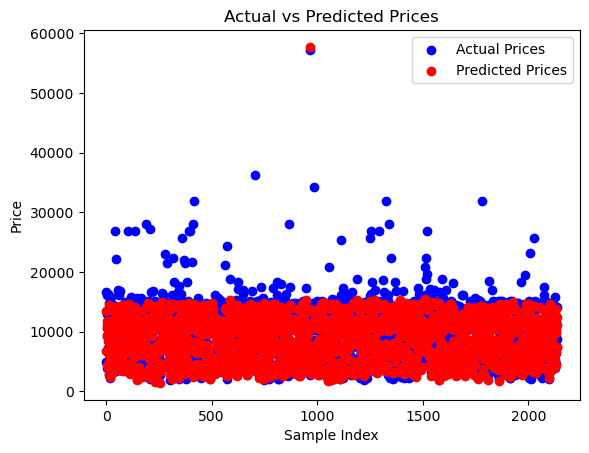

In [119]:
#Analysation 3 with Chart price predictions
import matplotlib.pyplot as plt

# Plotting actual prices
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')

# Plotting predicted prices
plt.scatter(range(len(y_test)), y_pred_test, color='red', label='Predicted Prices')

plt.title('Actual vs Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()


In [103]:
def convert_duration_to_datetime(duration_str):
    #print(duration_str)
    match = re.match(r'(\d+)\s*h\s*(\d*)\s*m', duration_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2))
        duration = timedelta(hours=hours, minutes=minutes)
        start_time = datetime.min + duration
        return start_time
    else:
        return None  # Return None for invalid format
    
def duration_to_minutes(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1].strip()
    if 'm' in duration:
        minutes = int(duration.split('m')[0])
    return hours * 60 + minutes

def convert_dep_arr_to_datetime(value1,value2):    
    # If the value contains a date (check for the presence of a space and a letter, as in "01:35 04 Mar")
    if ' ' in value1 and any(char.isalpha() for char in value1):        
        year = value2.year
        current_date = pd.to_datetime(str(value1)+ ' '+str(year), format='%H:%M %d %b %Y')        
        #current_date = pd.to_datetime(str(value1)+ ' '+str(year), format='%d/%m/%Y %H:%M')        
        return pd.to_datetime(current_date.strftime('%d/%m/%Y %H:%M'))
    else:
        # Parse value with current date
        #current_date = datetime.now().strftime('%Y-%m-%d')               
        current_date = value2.date().strftime('%d/%m/%Y')
        return pd.to_datetime(str(current_date) + ' ' + value1, format='%d/%m/%Y %H:%M')
    

# Function to categorize part of the day
def part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'